###  • DOMAIN: Automobile 

### • CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes 

### • DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon

### • Attribute Information: 

**1. mpg: continuous**

**2. cylinders: multi-valued discrete**

**3. displacement: continuous**

**4. horsepower: continuous**

**5. weight: continuous**

**6. acceleration: continuous**

**7. model year: multi-valued discrete**

**8. origin: multi-valued discrete**

**9. car name: string (unique for each instance)**


### • PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 

### Importing Libraries:

In [1]:
#Standard libraries for data analysis and data visualization:    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

#sklearn modules for Model Evaluation & Improvement:

from scipy.stats import zscore    
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,log_loss, classification_report, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import fcluster

import random
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\RajSri\\Documents\\PGP AIML GL Notebooks\\19. Unsupervised Learning - Project')

### 1. Import and warehouse data:

In [3]:
#reading json file format

df1 = pd.read_json('Part1 - Car-Attributes.json') 

In [4]:
#reading csv file

df2=pd.read_csv('Part1 - Car name.csv') 

In [5]:
#Loading the json file and concatinating it with car names( Merge all datasets onto one)

car=pd.concat([df1,df2],axis=1)
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Explore final shape and size.

row, column = car.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 9 columns


In [7]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format

car.to_csv('carsfile.csv') #exporting as csv file
car.to_json('carsfile.json') #exporting as json file
car.to_excel('carsfile.xlsx') #exporting as excel file

In [8]:
car_csv=pd.read_csv('carsfile.csv')
car_json=pd.read_json('carsfile.json')
car_excel=pd.read_excel('carsfile.xlsx')

### 2. Data cleansing:

####  Missing/incorrect value treatment

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
car.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

#### Insight: There is no missing values in dataset. But HP column has datatype as object instead of int; so it may have junk values.

In [11]:
# Checking junk values in HP column:

car['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [12]:
car[car['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


#### Here we can see few values has "?" as value which needs to be treated. Hence replacing "?" as median.

In [13]:
 #getting median value of column

median_hp=car[car['hp']!='?']['hp'].median()

In [14]:
car['hp'].replace("?",median_hp,inplace=True)

In [15]:
#changing datatype as float

car['hp']=car['hp'].astype('float64') 

####  Droping attribute/s if required using relevant functional knowledge


In [16]:
#dropping/ignoring car_name
car = car.drop(['car_name'], axis =1)

# Also replacing the categorical var with actual values
car['origin'] = car['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


In [17]:
car['origin'].value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [18]:
car['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [19]:
# Encoding cylinder values

#labelencoder=LabelEncoder()

In [20]:
#car['cyl']=labelencoder.fit_transform(car['cyl'])

In [21]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
car['mpg_level'] = car['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
car.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,america,medium
1,15.0,8,350.0,165.0,3693,11.5,70,america,low
2,18.0,8,318.0,150.0,3436,11.0,70,america,medium
3,16.0,8,304.0,150.0,3433,12.0,70,america,low
4,17.0,8,302.0,140.0,3449,10.5,70,america,medium


### 3. Data analysis & visualisation:

#### Statistical analysis on the data.

In [22]:
car.describe()

,mpg,cyl,disp,hp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### Mpg: Mean and median are equal so the distribution might be normal.
#### Displacement: Mean is greater than median so there might be right skewness in the data.We can see extreme values as well
#### Horsepower: Mean is slightly higher than Medain.
#### Weight: Mean is slightly higher than Medain.
#### Acceleration: Mean and Median are equal and there is no variation. Hence it may be a normal distribution.

### Univariate, bivariate and multivariate analysis

In [23]:
#categorical variable
car_cat = car.iloc[:,[1,6,7,8]]
car_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,america,medium
1,8,70,america,low
2,8,70,america,medium
3,8,70,america,low
4,8,70,america,medium


In [24]:
#numeric variables
car_num=car.drop(['cyl','yr','origin','mpg_level'],axis=1)
car_num.head()

,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


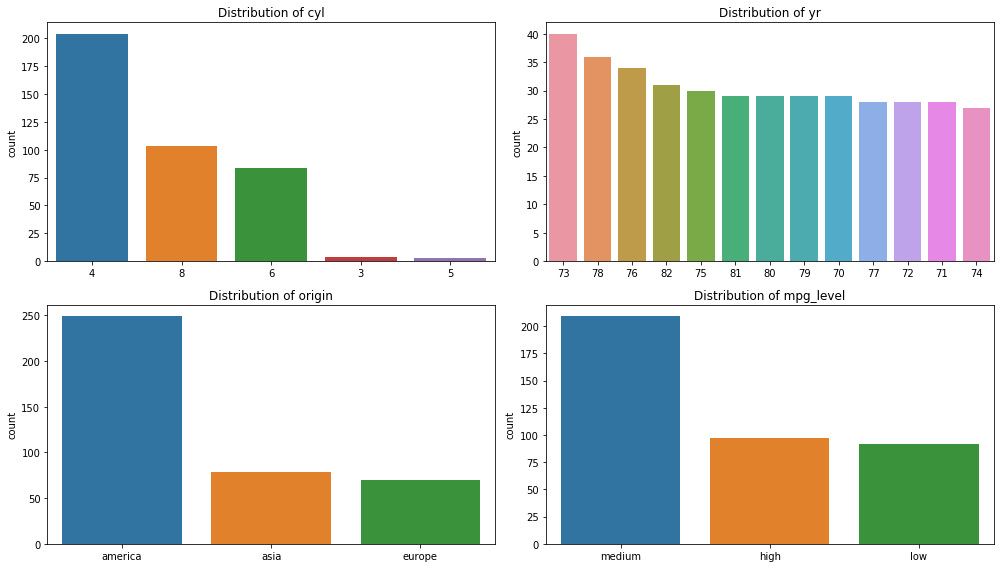

In [25]:
#plotting categorical variables
fig = plt.figure(1, (14, 8))

for i,car in enumerate(car_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(car_cat[car], order=car_cat[car].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {car}')
    plt.tight_layout()

plt.show()

#### Insight: American 4 cylinder cars  with medium mpg level seem to dominate the dateset


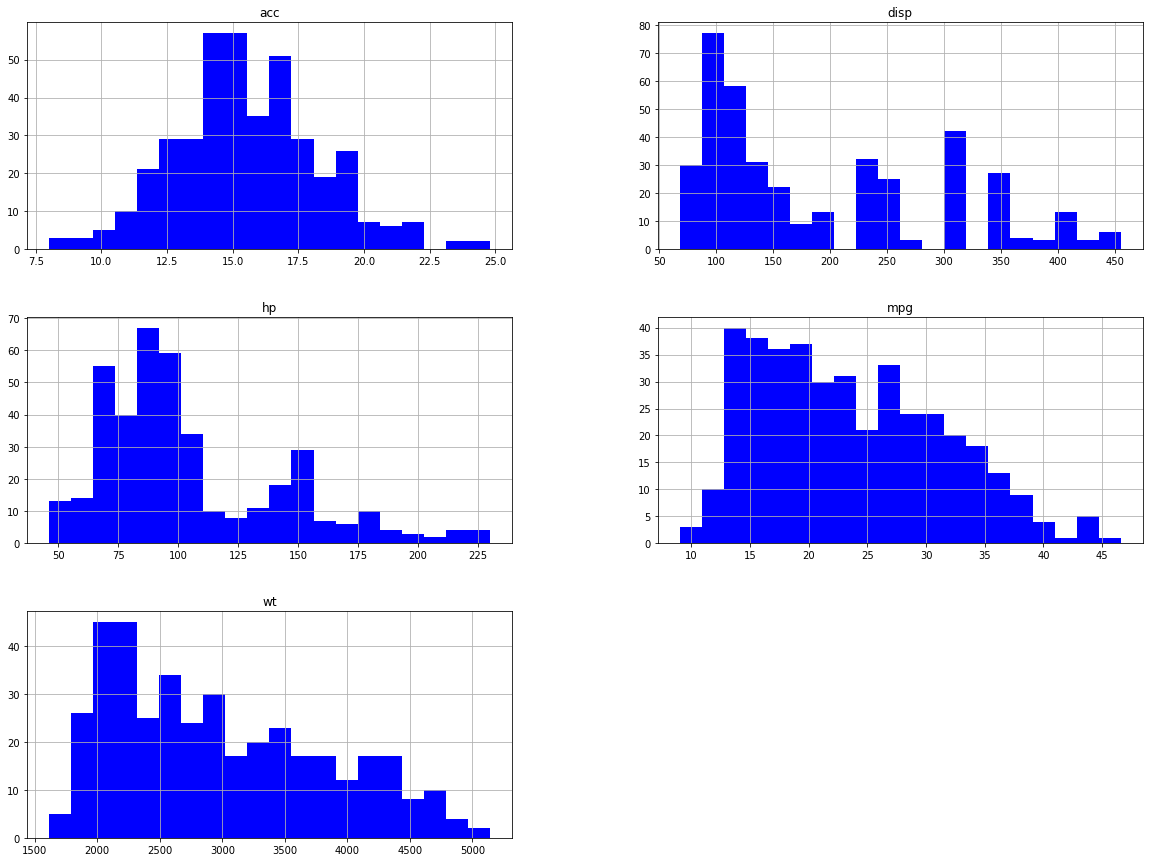

In [26]:
#plot histograms for numerical variables
car_num.hist(bins = 20,figsize = (20, 15), color = 'blue')
plt.show()

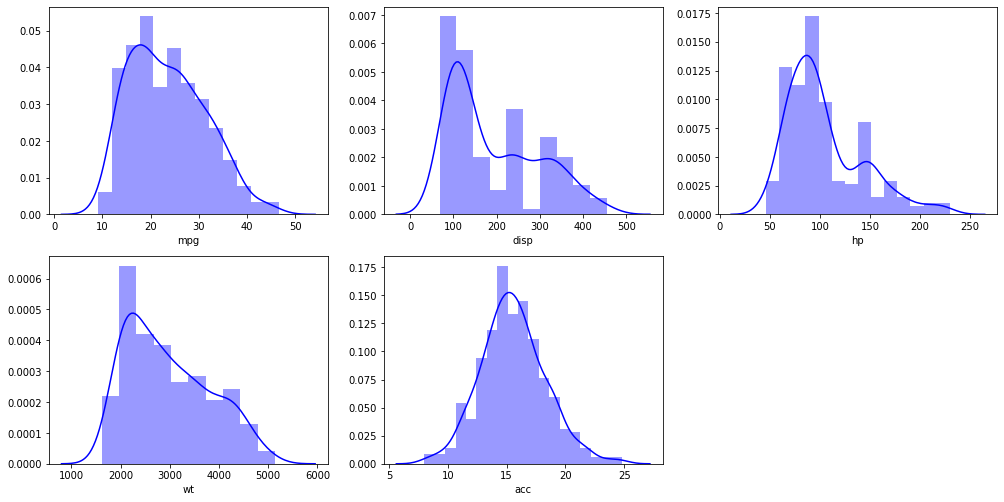

In [27]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in car_num.columns:
    plt.subplot(3, 3, col)
    sns.distplot(car_num[i], color = 'b')
    col += 1 


#### Displacement and Horsepower seem to be skewed to the right

In [28]:
#joining the categorical and numerical variables
car=pd.concat([car_cat,car_num],axis=1)

In [29]:
#checking for attribute type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cyl          398 non-null int64
yr           398 non-null int64
origin       398 non-null object
mpg_level    398 non-null object
mpg          398 non-null float64
disp         398 non-null float64
hp           398 non-null float64
wt           398 non-null int64
acc          398 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [30]:
#create dummy varibale for mpg_level and origin 
car = pd.get_dummies(car, columns=['origin'])
car = pd.get_dummies(car, columns=['mpg_level'])
car.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1


In [31]:
# creating a seperate datset for k-means and heirarchical clustering

carH=car.copy()
carK=car.copy()

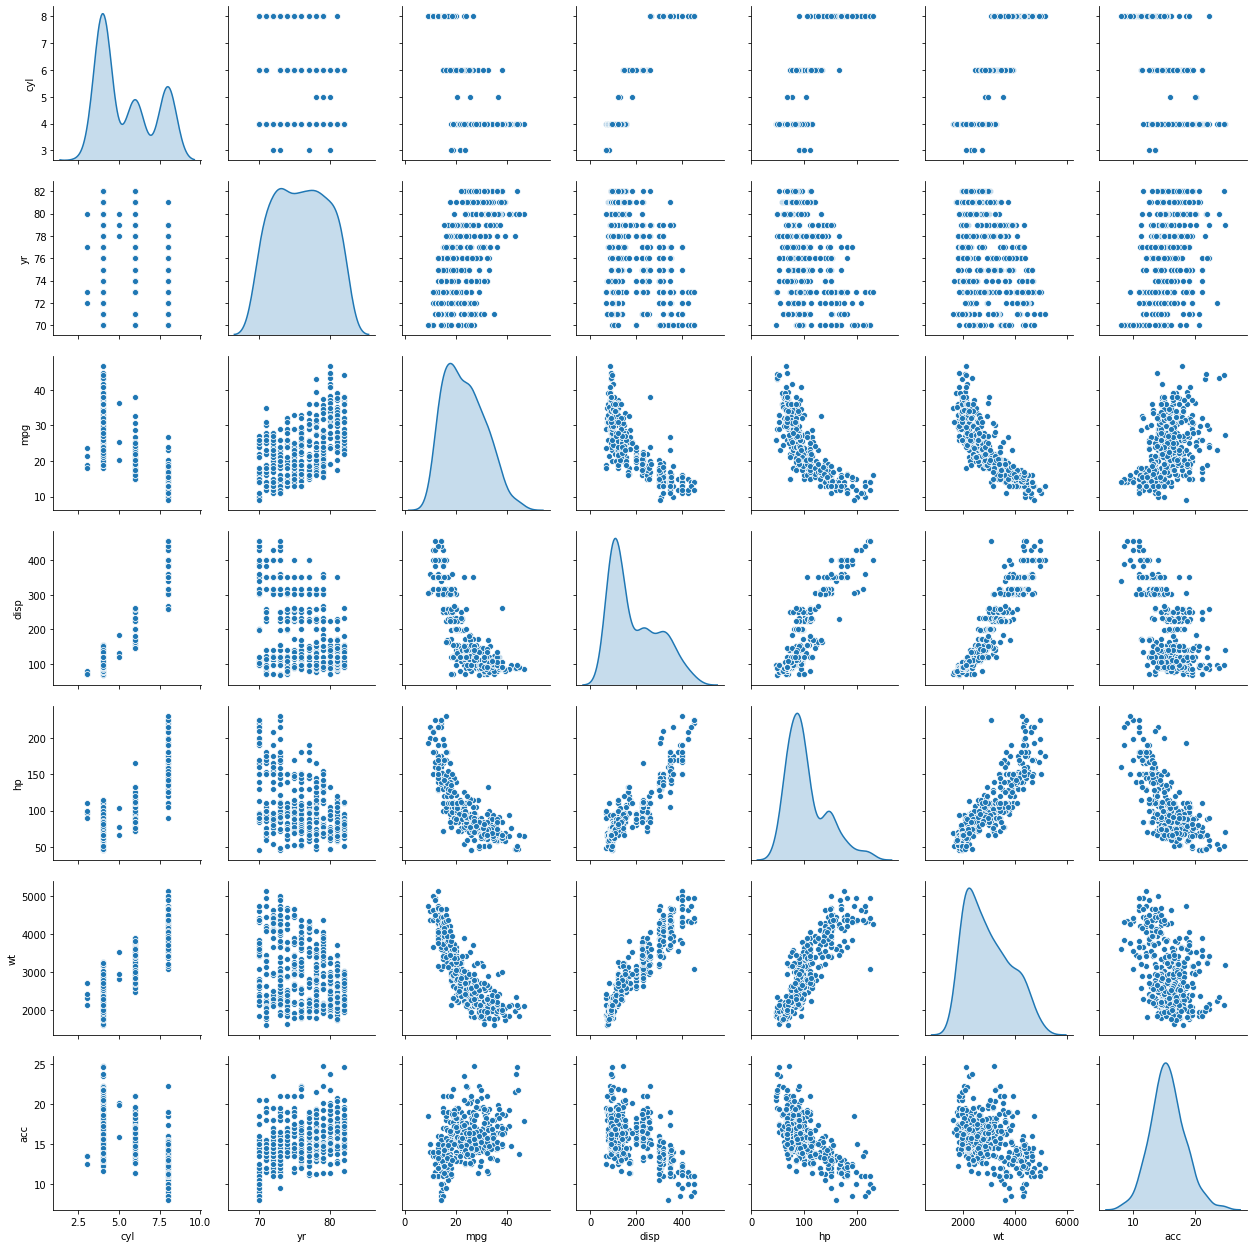

In [32]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

- **Acceleration , mpg, horsepower are nearly normal**


- **HorsePower has positive relationship with weight and displacement**


- **Mpg shows negative linear relationship with weight,displacement and horsepower**


- **Mpg value is differenct for each cylinders.**


- **Mpg has no relationship with acceleration.**

In [33]:
#dropping the created dummy variable
car2=car.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

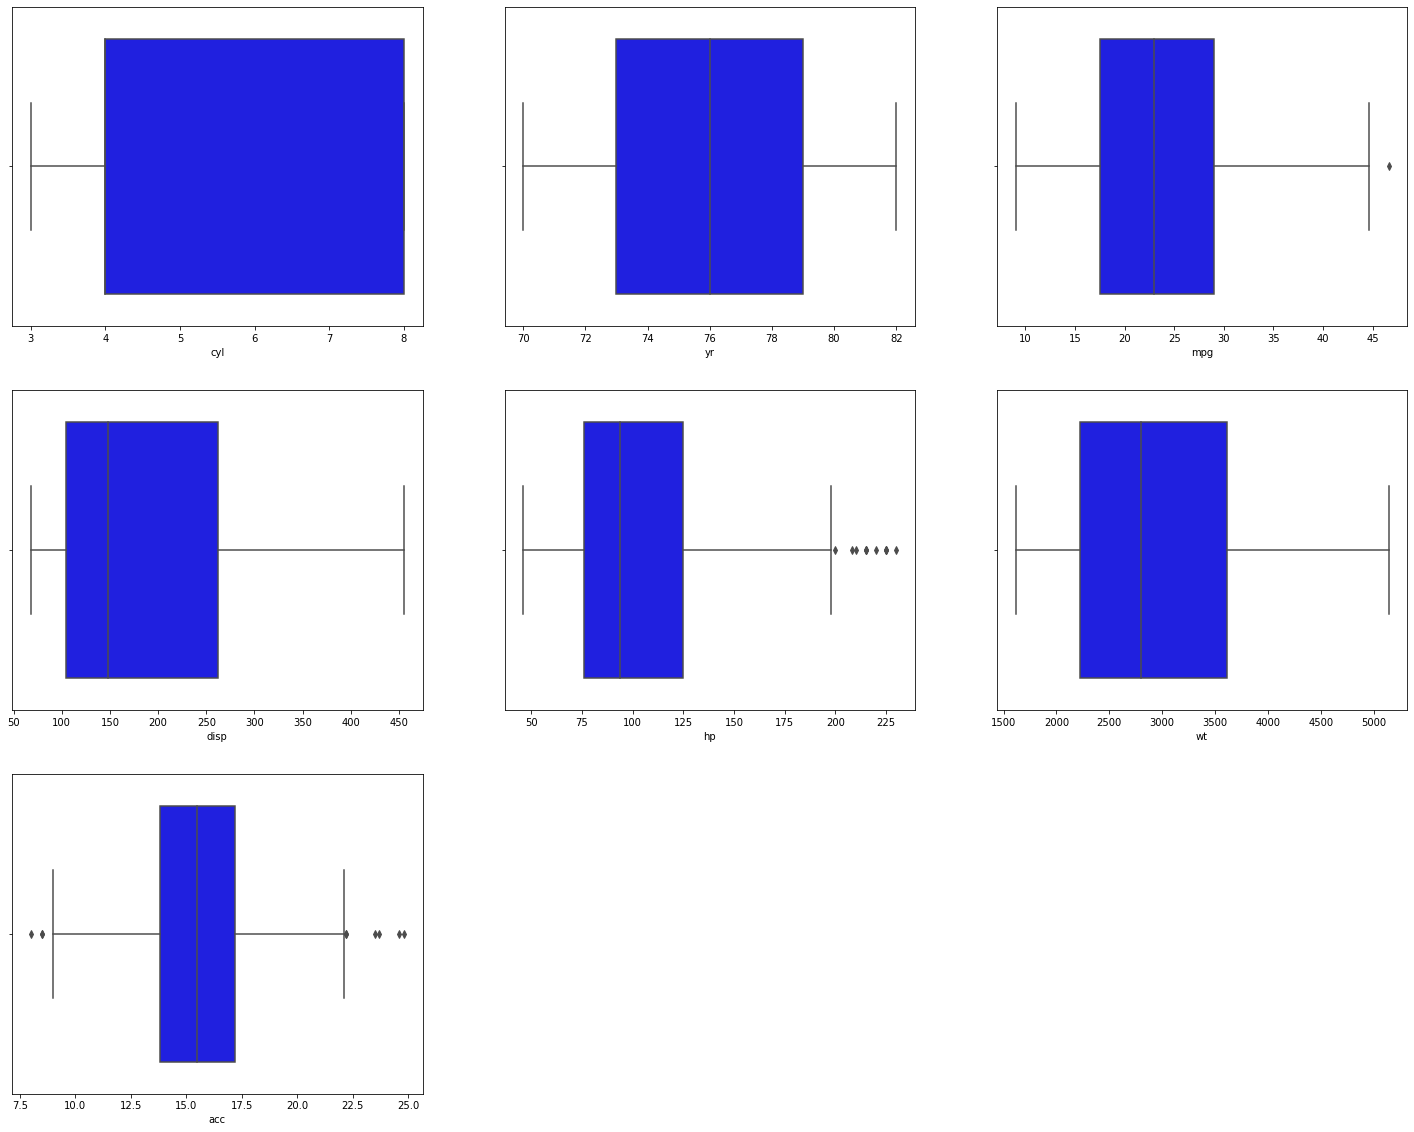

In [34]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in car2.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(car2[i],color='blue')
    col += 1

In [35]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(car2['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(car2['acc'], interpolation = 'midpoint')

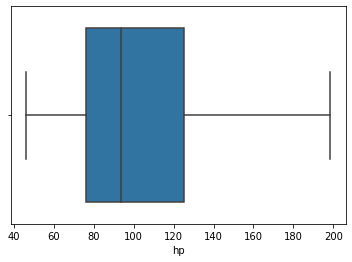

In [36]:
#Horsepower after imputing outliers
Q3 = car2['hp'].quantile(0.75)
car2['hp'] = np.where(car2["hp"] >(Q3+1.5*IQR1), 198.5,car2['hp'])
sns.boxplot(car2['hp']);

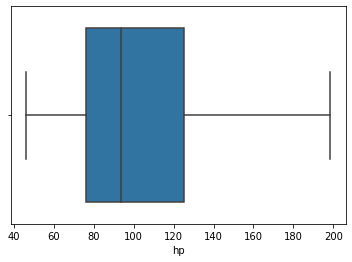

In [37]:
#Horsepower after imputing outliers
Q3 = car2['hp'].quantile(0.75)
car2['hp'] = np.where(car2["hp"] >(Q3+1.5*IQR1), 198.5,car2['hp'])
sns.boxplot(car2['hp']);

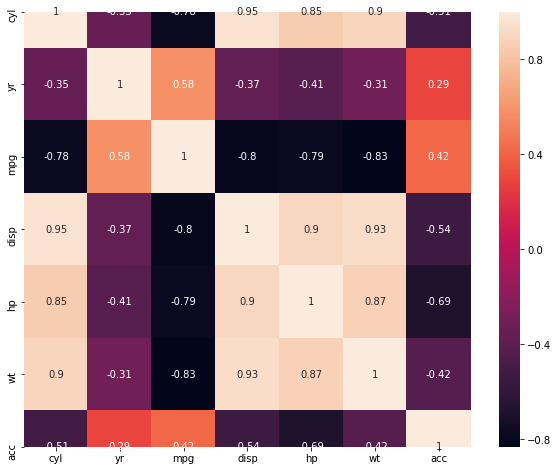

In [38]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=car2.corr()
sns.heatmap(corr,annot=True);

#### Insight: Except Year, most of the variable are correlated with each other

## 4. Machine learning:

### Heirarchical Clustering

In [39]:
#separating numeric variables
cc = car.iloc[:,0:7] 
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,8,70,18.0,307.0,130.0,3504,12.0
1,8,70,15.0,350.0,165.0,3693,11.5
2,8,70,18.0,318.0,150.0,3436,11.0
3,8,70,16.0,304.0,150.0,3433,12.0
4,8,70,17.0,302.0,140.0,3449,10.5


In [40]:
#scaling the variable
cc_z = cc.apply(zscore)
cc_z.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [41]:
#calculating pairwise distance using average linkage method
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')

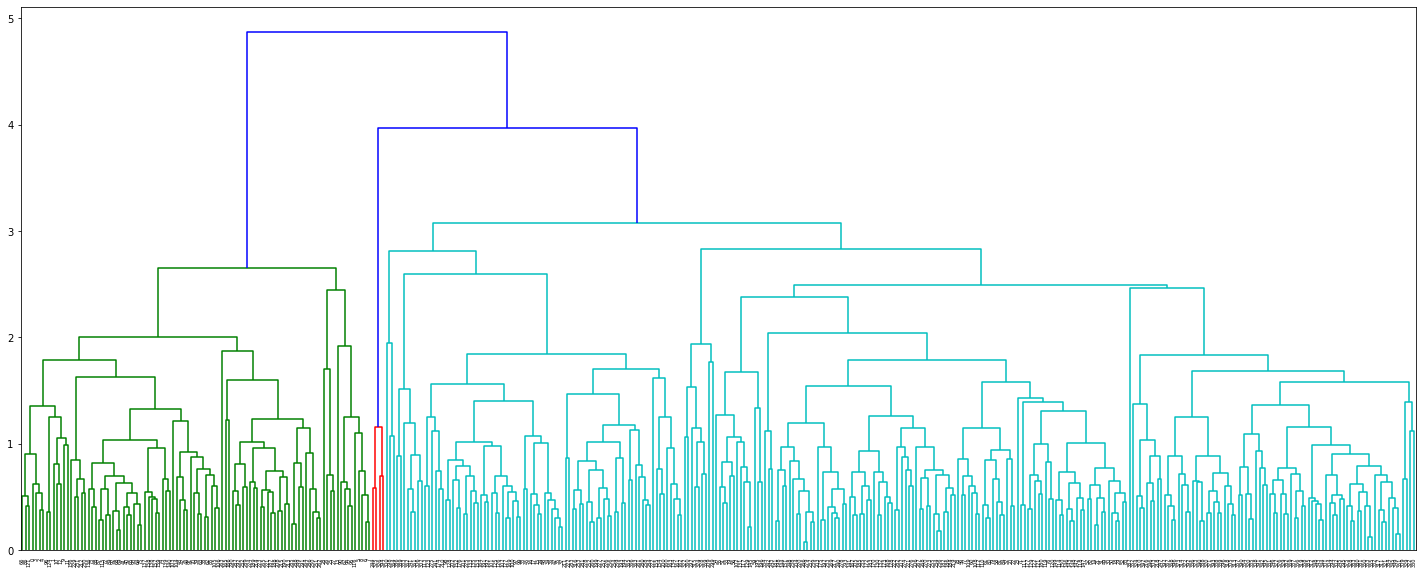

In [42]:
#plotting the H-cluster
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

#### Insight: its is not visually appealing, hence we'll go ahead and cut down the dendrogram to give us 2 clusters/groups

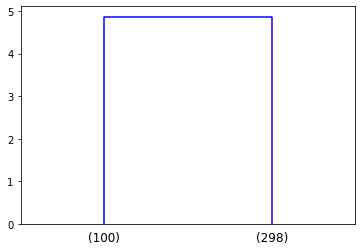

In [43]:
# dendrogram function to arrive at dendrogram
dendrogram(
    link_method,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [44]:
#vieweing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [45]:
#attaching the clusters formed to the scales data
cc_z['clusters_H'] = clusters
cc_z.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [46]:
#vieweing the distribution of clusters
cc_z.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [47]:
#attaching the clusters formed to the original data
cc['clusters_H']=clusters
carH['clusters_H']=clusters
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [48]:
#create a new data set named Hclus
Hclus=cc
Hclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [49]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
clusters_H,,,,,,,,
1,7.980000,73.740000,14.684000,345.470000,160.400000,4121.560000,12.702000,100
2,4.607383,76.771812,26.477852,142.404362,85.479866,2584.137584,16.529866,298


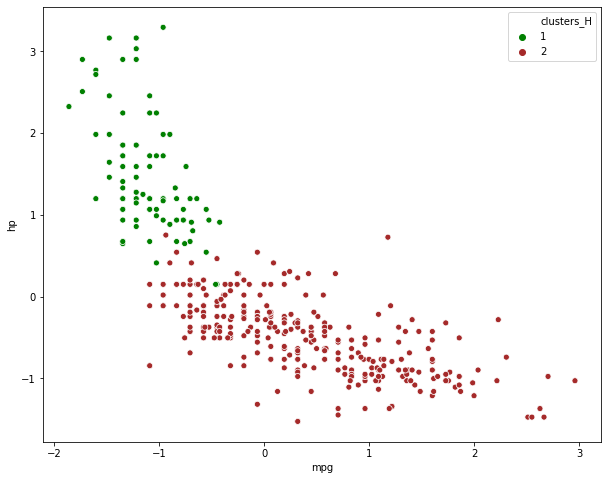

In [50]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=cc_z, 
                    palette=['green','brown']);

### K-Means Clustering

In [51]:
#seperating the numeric values
cc = car.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [53]:
cluster_range = range( 2, 6 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,random_state=1)
  clusters.fit(cc_z1)# cc_z1 ia the scaled dataset from the previous cell
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1294.841895
1,3,946.019791
2,4,738.393224
3,5,664.952813


#### Within Cluster Sum of Squares: One measurement is Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. 

In [54]:
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[2786.0, 1295.1229352629578, 946.0197908553791, 738.4159737149628]

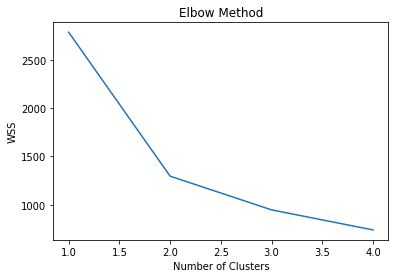

In [55]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");


In [56]:
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [57]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.48235946103916116

In [58]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

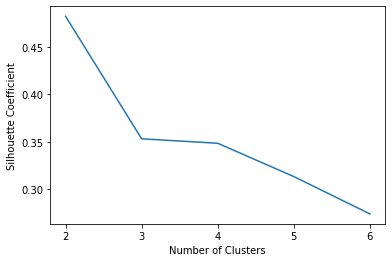

In [59]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [60]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [61]:
#vieweing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [62]:
#attaching the clsuters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [63]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
cluster_K,,,,,,,,
0,4.569966,76.822526,26.619113,140.250853,85.061433,2567.860068,16.535836,293
1,7.923810,73.742857,14.851429,341.809524,158.000000,4093.771429,12.867619,105


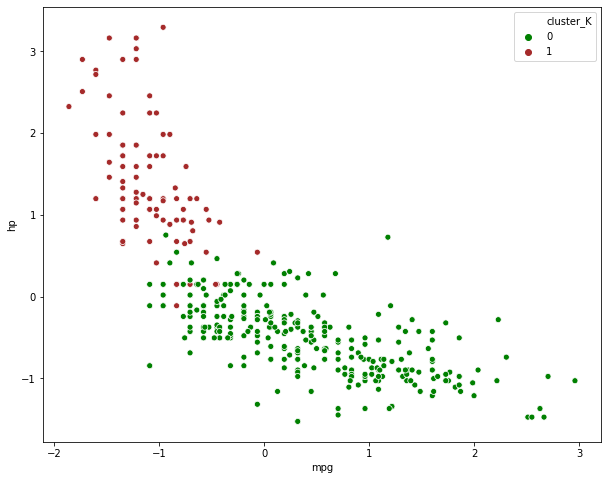

In [64]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','brown']);

In [65]:
# Distribution in hierachical clustering
carH.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [66]:
# Distribution in K Means Clustering
carK.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [67]:
carH.shape

(398, 14)

In [68]:
carH.shape

(398, 14)

In [69]:
car.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1


### Linear regression on the original dataset


In [70]:
X = car.drop(['mpg','origin_europe','mpg_level_low'], axis=1)
# the dependent variable
y = car[['mpg']]


In [71]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.5134441386218939
The coefficient for yr is 0.44346504291168265
The coefficient for disp is 0.01068885839464703
The coefficient for hp is 0.010315514536313882
The coefficient for wt is -0.004538788568737155
The coefficient for acc is 0.1918342560886259
The coefficient for origin_america is -1.7306209513689055
The coefficient for origin_asia is -0.8976724344009429
The coefficient for mpg_level_high is 8.552374663817028
The coefficient for mpg_level_medium is 1.5941218694850463


In [74]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.6635717568649753


In [75]:
regression_model.score(X_train, y_train)

0.8967703023839786

In [76]:
testscore=regression_model.score(X_test, y_test)
testscore

0.9037421476349176

### Linear regression on data with K means cluster

In [77]:
#renaming the cluster labels to light and heavy vehicles and creating dummy variables of it
carK['cluster_K']=carK['cluster_K'].astype('category')
carK['cluster_K'] = carK['cluster_K'].replace({1: 'heavy', 0: 'light'})
carK = pd.get_dummies(carK, columns=['cluster_K'])

In [78]:
carK.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium,cluster_K_heavy,cluster_K_light
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1,1,0
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1,1,0
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1,1,0


In [79]:
X = carK.drop(['mpg','origin_europe','mpg_level_low','cluster_K_light'], axis=1)
# the dependent variable
y = carK[['mpg']]

In [80]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [81]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.194599564477749
The coefficient for yr is 0.43186510415059765
The coefficient for disp is 0.017477496279109935
The coefficient for hp is -0.010138045835905864
The coefficient for wt is -0.004068430169386408
The coefficient for acc is 0.18564828746250023
The coefficient for origin_america is -1.6918315494304068
The coefficient for origin_asia is -0.740777919230303
The coefficient for mpg_level_high is 9.283120939156879
The coefficient for mpg_level_medium is 2.2500017142312445
The coefficient for cluster_K_heavy is 2.511514014338477


In [83]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.2041468067172545


In [84]:
regression_model.score(X_train, y_train)

0.8942370456543635

In [85]:
K=regression_model.score(X_test, y_test)
K

0.9117893808052381

### Linear regression on data with H-clusters

In [86]:
#renaming the cluster labels to light and heavy vehicles and creating summy variable of it
carH['clusters_H']=carH['clusters_H'].astype('category')
carH['clusters_H'] = carH['clusters_H'].replace({1: 'heavy', 2: 'light'})
carH = pd.get_dummies(carH, columns=['clusters_H'])

In [87]:
X = carH.drop(['mpg','origin_europe','mpg_level_low','clusters_H_light'], axis=1)
# the dependent variable
y = carH[['mpg']]

In [88]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [89]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.0104832432575337
The coefficient for yr is 0.447541735755015
The coefficient for disp is 0.015115200524614479
The coefficient for hp is -0.013301584387234108
The coefficient for wt is -0.004264179780672576
The coefficient for acc is 0.1180513916448483
The coefficient for origin_america is -2.117456931539112
The coefficient for origin_asia is -1.3974915348558112
The coefficient for mpg_level_high is 8.56594823929828
The coefficient for mpg_level_medium is 1.657725069858281
The coefficient for clusters_H_heavy is 2.0389744688074063


In [91]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.57272931823265


In [92]:
regression_model.score(X_train, y_train)

0.8988409890950728

In [93]:
H=regression_model.score(X_test, y_test)
H

0.901023837384672

In [94]:
modellists = []
modellists.append(['Linear Regression on Original Data set', testscore*100])
modellists.append(['Linear Regression with K means clusters', K*100])
modellists.append(['Linear Regression with Heirarchical clusters', H*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

,Model,r^2 on Test
0,Linear Regression on Original Data set,90.374215
1,Linear Regression with K means clusters,91.178938
2,Linear Regression with Heirarchical clusters,90.102384


### Summary

- **K-means appears to explain the highest variation in the datset, but with a difference of only 1% when compared with other models, to get more clarity a larger dataset may be used, since this is a dataset of used cars it doesn't give us how many previous owners has the cars seen which might be helful variable,the gender of the previous owners, the reason/purpose that the cars were being used is also an important factor which the dataset doen't capture. With the above mentioned features it may be possible to get a higher accuracy or explainability of the models and its variables.**

- **We are getting high accuracy when model is built on entire data.**


- **But coefficients values are different in single model vs cluster models.**


- **From cluster model we can see horsepower has huge negative impact on cluster having high mpg values. This inference is not possible in single model.**


- **These are advantages on creating separate clusters. Though the accuracy is less for cluster models interpretation of coefficients are clear in these models**

### 6. Improvisation: 

- **Quality: Quality of the data seems pretty decent except few missing values, rest were in place. Along with these details if data is provided for how many km it ran we can able to predict better. Some uses cars daily or some will use in daily basis .So by Km ran we can predict mpg accurately**


- **Quantity: Even though the quantity of the data was sufficient to build a good model, for each separate cluster data is less to predict. Tt is always beneficial to collect more and more data. So, my only suggestion would be to collect more and more data**
  
  
- **Variety: We have just dealt with the structured tabular data in our model building process and used a supervised learning method which deals with only structured data. But as far as variety of the data is concerned, it is always helpful to collect more and more data in any form that we could work. Like, it may be helpful if the data collection team could collect some more category of information related to car.**


- **Velocity: Since we are not doing any real-time analysis. So it would be difficult to comment on the velocity of the data. But as far as the entire process is concerned, it is always beneficial to collect the data as fast as possible, so that we could come up with better strategies to cluster and predict the data. Data would be of no use if it gets outdated and then it would be difficult to predict car's mpg today based on outdated data.**


- **Veracity: Since the data has been provided by the automobile team itself, hence the data is completely authentic. As far as noise and abnormalities in the data are concerned, the abnormalities that we saw in the data is not because of the inauthentic data but due to their own nature.**